In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

u_file = '/Users/damienirving/Downloads/Data/ua_ERAInterim_500hPa_2006-030day-runmean_native.nc'
v_file = '/Users/damienirving/Downloads/Data/va_ERAInterim_500hPa_2006-030day-runmean_native.nc'

In [2]:
date = iris.time.PartialDateTime(year=2006, month=5, day=22)
time_constraint = iris.Constraint(time=date)

with iris.FUTURE.context(cell_datetime_objects=True):
    u_cube = iris.load_cube(u_file, 'eastward_wind' & time_constraint)  
    v_cube = iris.load_cube(v_file, 'northward_wind' & time_constraint) 

In [5]:
%matplotlib inline

def plot_winds(u, v):
    """Plot the wind."""

    proj = ccrs.PlateCarree(central_longitude=-180.0)
    fig = plt.figure(figsize=(12, 5))

    ax = plt.subplot(121, projection=proj)
    qplt.contourf(u, 15)
    plt.gca().coastlines()

    ax = plt.subplot(122, projection=proj)
    qplt.contourf(v, 15)
    plt.gca().coastlines()

    iplt.show()

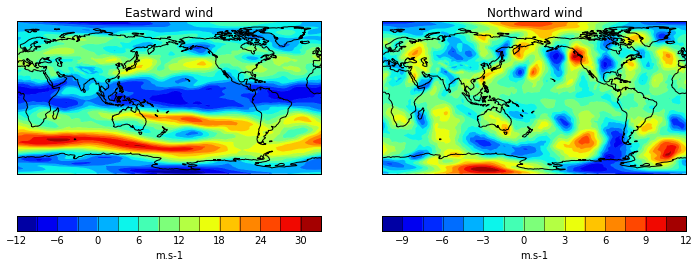

In [6]:
plot_winds(u_cube, v_cube)

In [9]:
rotated_cs = iris.coord_systems.RotatedGeogCS(20, 260)
urot_cube, vrot_cube = iris.analysis.cartography.rotate_winds(u_cube, v_cube, rotated_cs)

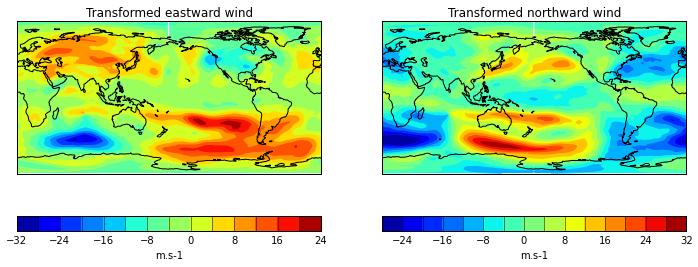

In [10]:
plot_winds(urot_cube, vrot_cube)

In [15]:
print vrot_cube

transformed_northward_wind / (m s**-1) (latitude: 241; longitude: 480)
     Dimension coordinates:
          latitude                              x               -
          longitude                             -               x
     Auxiliary coordinates:
          projection_x_coordinate               x               x
          projection_y_coordinate               x               x
     Scalar coordinates:
          time: 2006-05-22 06:00:00
     Attributes:
          CDI: Climate Data Interface version 1.5.3 (http://code.zmaw.de/projects/cdi...
          CDO: Climate Data Operators version 1.5.3 (http://code.zmaw.de/projects/cdo...
          Conventions: CF-1.0
          history: Mon Jun 15 13:04:23 2015: ncatted -O -a axis,time,c,c,T va_ERAInterim_500hPa_2006-030day-runmean_native.nc
Mon...
          level: 500hPa
          nco_openmp_thread_number: 1


In [13]:
vrot_cube.aux_coords

(DimCoord(array([ 932574.]), standard_name=u'time', units=Unit('hours since 1900-01-01 00:00:00', calendar='standard'), var_name='time'),
 AuxCoord(array([[ -1.80000000e+02,  -1.80000000e+02,  -1.80000000e+02, ...,
          -1.80000000e+02,  -1.80000000e+02,  -1.80000000e+02],
        [ -1.79213346e+02,  -1.79215180e+02,  -1.79217150e+02, ...,
          -1.79208654e+02,  -1.79210082e+02,  -1.79211646e+02],
        [ -1.78425415e+02,  -1.78428989e+02,  -1.78432834e+02, ...,
          -1.78416320e+02,  -1.78419080e+02,  -1.78422112e+02],
        ..., 
        [ -1.56938441e+00,  -1.56543792e+00,  -1.56122479e+00, ...,
          -1.57961660e+00,  -1.57647445e+00,  -1.57306350e+00],
        [ -7.85353780e-01,  -7.83426080e-01,  -7.81364523e-01, ...,
          -7.90330310e-01,  -7.88806215e-01,  -7.87147269e-01],
        [ -3.67679258e-15,  -3.66799137e-15,  -3.65856166e-15, ...,
          -3.69941074e-15,  -3.69250362e-15,  -3.68496380e-15]]), standard_name='projection_x_coordinate', unit